# Chapter 4:
## Real-world data representation using tensors

In [1]:
import imageio
img_arr = imageio.imread('../data/image-dog/bobby.jpg')
img_arr.shape

/tmp/ipykernel_81152/642592253.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread('../data/image-dog/bobby.jpg')


(720, 1280, 3)

In [2]:
# PyTorch modules dealing with image data require tensors to be laid out as C × H × W : 
# channels, height, and width, respectively.
import torch
torch.set_printoptions(edgeitems=2, precision=2, linewidth=75)
img = torch.from_numpy(img_arr)
out = img.permute(2, 0, 1) # permute changes the dimensions
# out

In [3]:
batch_size = 3
batch = torch.zeros(batch_size, 3, 256, 256, dtype=torch.uint8)

In [4]:
import os
data_dir = '../data/image-cats/'
filenames = [name for name in os.listdir(data_dir) if os.path.splitext(name)[-1] == '.png']
for i, filename in enumerate(filenames):
    img_arr = imageio.imread(os.path.join(data_dir, filename))
    img_t = torch.from_numpy(img_arr)
    img_t = img_t.permute(2, 0, 1)
    img_t = img_t[:3]
    batch[i] = img_t

/tmp/ipykernel_81152/4275087228.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  img_arr = imageio.imread(os.path.join(data_dir, filename))


In [5]:
batch = batch.float()
# batch /= 255.0
# instead we can use this way:
n_channels = batch.shape[1]
for c in range(n_channels):
    mean = torch.mean(batch[:, c])
    std = torch.std(batch[:, c])
    batch[:, c] = (batch[:, c] - mean) / std

In [6]:
dir_path = "../data/volumetric-dicom/2-LUNG 3.0  B70f-04083"
vol_arr = imageio.volread(dir_path, 'DICOM')
vol_arr.shape

Reading DICOM (examining files): 1/99 files (1.0%99/99 files (100.0%)
  Found 1 correct series.
Reading DICOM (loading data): 75/99  (75.899/99  (100.0%)


(99, 512, 512)

In [7]:
vol = torch.from_numpy(vol_arr).float()
vol = torch.unsqueeze(vol, 0)

In [8]:
vol.shape

torch.Size([1, 99, 512, 512])

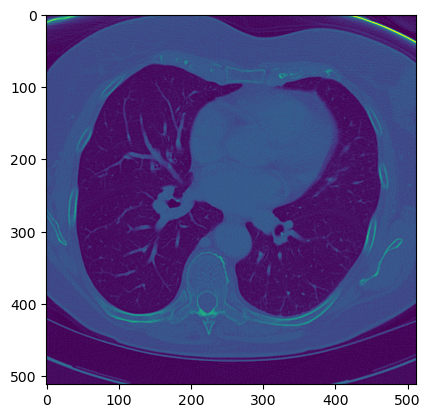

In [9]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(vol_arr[50])

### tabular data

In [10]:
import numpy as np
import csv
wine_path = "../data/tabular-wine/winequality-white.csv"
wineq_numpy = np.loadtxt(wine_path, dtype=np.float32, delimiter=";", skiprows=1)
wineq_numpy

array([[ 7.  ,  0.27,  0.36, ...,  0.45,  8.8 ,  6.  ],
       [ 6.3 ,  0.3 ,  0.34, ...,  0.49,  9.5 ,  6.  ],
       [ 8.1 ,  0.28,  0.4 , ...,  0.44, 10.1 ,  6.  ],
       ...,
       [ 6.5 ,  0.24,  0.19, ...,  0.46,  9.4 ,  6.  ],
       [ 5.5 ,  0.29,  0.3 , ...,  0.38, 12.8 ,  7.  ],
       [ 6.  ,  0.21,  0.38, ...,  0.32, 11.8 ,  6.  ]], dtype=float32)

In [11]:
col_list = next(csv.reader(open(wine_path), delimiter=';'))

wineq_numpy.shape, col_list

((4898, 12),
 ['fixed acidity',
  'volatile acidity',
  'citric acid',
  'residual sugar',
  'chlorides',
  'free sulfur dioxide',
  'total sulfur dioxide',
  'density',
  'pH',
  'sulphates',
  'alcohol',
  'quality'])

In [12]:
wineq = torch.from_numpy(wineq_numpy)

wineq.shape, wineq.dtype

(torch.Size([4898, 12]), torch.float32)

In [13]:
wineq

tensor([[ 7.00,  0.27,  ...,  8.80,  6.00],
        [ 6.30,  0.30,  ...,  9.50,  6.00],
        ...,
        [ 5.50,  0.29,  ..., 12.80,  7.00],
        [ 6.00,  0.21,  ..., 11.80,  6.00]])

In [14]:
data = wineq[:, :-1] # everything but last column, <1>
data, data.shape

(tensor([[ 7.00,  0.27,  ...,  0.45,  8.80],
         [ 6.30,  0.30,  ...,  0.49,  9.50],
         ...,
         [ 5.50,  0.29,  ...,  0.38, 12.80],
         [ 6.00,  0.21,  ...,  0.32, 11.80]]),
 torch.Size([4898, 11]))

In [15]:
target = wineq[:, -1] # last column
target, target.shape

(tensor([6., 6.,  ..., 7., 6.]), torch.Size([4898]))

In [16]:
target = wineq[:, -1].long()
target

tensor([6, 6,  ..., 7, 6])

In [17]:
target_onehot = torch.zeros(target.shape[0], 10)
target_onehot.scatter_(1, target.unsqueeze(1), 1.0)

tensor([[0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.],
        ...,
        [0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.]])

In [18]:
target_unsqueezed = target.unsqueeze(1)
target_unsqueezed

tensor([[6],
        [6],
        ...,
        [7],
        [6]])

In [19]:
data_mean = torch.mean(data, dim=0)
data_var = torch.var(data, dim=0)
data_mean, data_var

(tensor([6.85e+00, 2.78e-01, 3.34e-01, 6.39e+00, 4.58e-02, 3.53e+01,
         1.38e+02, 9.94e-01, 3.19e+00, 4.90e-01, 1.05e+01]),
 tensor([7.12e-01, 1.02e-02, 1.46e-02, 2.57e+01, 4.77e-04, 2.89e+02,
         1.81e+03, 8.95e-06, 2.28e-02, 1.30e-02, 1.51e+00]))

In [20]:
data_normalized = (data - data_mean) / torch.sqrt(data_var)
data_normalized

tensor([[ 1.72e-01, -8.18e-02,  ..., -3.49e-01, -1.39e+00],
        [-6.57e-01,  2.16e-01,  ...,  1.34e-03, -8.24e-01],
        ...,
        [-1.61e+00,  1.17e-01,  ..., -9.63e-01,  1.86e+00],
        [-1.01e+00, -6.77e-01,  ..., -1.49e+00,  1.04e+00]])

In [21]:
bad_indexes = target <= 3
bad_indexes.shape, bad_indexes.dtype, bad_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(20))

In [23]:
# advanced indexing
bad_data = data[bad_indexes]
bad_data.shape

torch.Size([20, 11])

In [24]:
bad_data

tensor([[8.50e+00, 2.60e-01, 2.10e-01, 1.62e+01, 7.40e-02, 4.10e+01,
         1.97e+02, 9.98e-01, 3.02e+00, 5.00e-01, 9.80e+00],
        [5.80e+00, 2.40e-01, 4.40e-01, 3.50e+00, 2.90e-02, 5.00e+00,
         1.09e+02, 9.91e-01, 3.53e+00, 4.30e-01, 1.17e+01],
        [9.10e+00, 5.90e-01, 3.80e-01, 1.60e+00, 6.60e-02, 3.40e+01,
         1.82e+02, 9.97e-01, 3.23e+00, 3.80e-01, 8.50e+00],
        [7.10e+00, 3.20e-01, 3.20e-01, 1.10e+01, 3.80e-02, 1.60e+01,
         6.60e+01, 9.94e-01, 3.24e+00, 4.00e-01, 1.15e+01],
        [6.90e+00, 3.90e-01, 4.00e-01, 4.60e+00, 2.20e-02, 5.00e+00,
         1.90e+01, 9.92e-01, 3.31e+00, 3.70e-01, 1.26e+01],
        [1.03e+01, 1.70e-01, 4.70e-01, 1.40e+00, 3.70e-02, 5.00e+00,
         3.30e+01, 9.94e-01, 2.89e+00, 2.80e-01, 9.60e+00],
        [7.90e+00, 6.40e-01, 4.60e-01, 1.06e+01, 2.44e-01, 3.30e+01,
         2.27e+02, 9.98e-01, 2.87e+00, 7.40e-01, 9.10e+00],
        [8.30e+00, 3.30e-01, 4.20e-01, 1.15e+00, 3.30e-02, 1.80e+01,
         9.60e+01, 9.91e-01,

In [25]:
bad_data = data[target <= 3]
mid_data = data[(target > 3) & (target < 7)]
good_data = data[target >= 7]

In [26]:
bad_mean = torch.mean(bad_data, dim=0)
mid_mean = torch.mean(mid_data, dim=0)
good_mean = torch.mean(good_data, dim=0)

In [27]:
for i, args in enumerate(zip(col_list, bad_mean, mid_mean, good_mean)):
    print('{:2} {:20} {:6.2f} {:6.2f} {:6.2f}'.format(i, *args))

 0 fixed acidity          7.60   6.89   6.73
 1 volatile acidity       0.33   0.28   0.27
 2 citric acid            0.34   0.34   0.33
 3 residual sugar         6.39   6.71   5.26
 4 chlorides              0.05   0.05   0.04
 5 free sulfur dioxide   53.33  35.42  34.55
 6 total sulfur dioxide 170.60 141.83 125.25
 7 density                0.99   0.99   0.99
 8 pH                     3.19   3.18   3.22
 9 sulphates              0.47   0.49   0.50
10 alcohol               10.34  10.26  11.42


In [28]:
total_sulfur_threshold = 141.83
total_sulfur_data = data[:,6]
predicted_indexes = torch.lt(total_sulfur_data, total_sulfur_threshold)
predicted_indexes.shape, predicted_indexes.dtype, predicted_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(2727))

In [29]:
actual_indexes = target > 5
actual_indexes.shape, actual_indexes.dtype, actual_indexes.sum()

(torch.Size([4898]), torch.bool, tensor(3258))

In [ ]:
n_matches = torch.sum(actual_indexes & predicted_indexes).item()
n_predicted = torch.sum(predicted_indexes).item()
n_actual = torch.sum(actual_indexes).item()
n_matches, n_matches / n_predicted, n_matches / n_actual

### time series data

In [31]:
bikes_numpy = np.loadtxt("../data/bike-sharing-dataset/hour-fixed.csv", dtype=np.float32, delimiter=",",
                            skiprows=1, converters={1: lambda x: float(x[8:10])})
bikes = torch.from_numpy(bikes_numpy)
bikes

tensor([[1.00e+00, 1.00e+00,  ..., 1.30e+01, 1.60e+01],
        [2.00e+00, 1.00e+00,  ..., 3.20e+01, 4.00e+01],
        ...,
        [1.74e+04, 3.10e+01,  ..., 4.80e+01, 6.10e+01],
        [1.74e+04, 3.10e+01,  ..., 3.70e+01, 4.90e+01]])

In [32]:
# The first column is the index (the global ordering of the data), 
# the second is the date, and the sixth is the time of day.
bikes.shape, bikes.stride()

(torch.Size([17520, 17]), (17, 1))

In [33]:
# let’s reshape the data to have 3 axes—day, hour, and then our 17 columns
daily_bikes = bikes.view(-1, 24, bikes.shape[1])
daily_bikes.shape, daily_bikes.stride()

(torch.Size([730, 24, 17]), (408, 17, 1))

In [34]:
# To get to our desired N × C × L ordering, we need to transpose the tensor:
daily_bikes = daily_bikes.transpose(1, 2)
daily_bikes.shape, daily_bikes.stride()

(torch.Size([730, 17, 24]), (408, 1, 17))

In [35]:
# let's initialize a zero-filled matrix with a number of rows equal to the number of
# hours in the day and number of columns equal to the number of weather levels
first_day = bikes[:24].long()
weather_onehot = torch.zeros(first_day.shape[0], 4)
first_day[:,9]

tensor([1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 2, 2,
        2, 2])

In [36]:
# let's scatter ones into our matrix according to the corresponding 
# level at each row and use unsqueeze to add a singleton dimension
weather_onehot.scatter_(dim=1, index=first_day[:,9].unsqueeze(1).long() - 1, value=1.0)
# -1 in long() - 1 decreases the values by 1 because
# weather situation ranges from 1 to 4, while indices are 0-based

tensor([[1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [1., 0., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 0., 1., 0.],
        [0., 0., 1., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.],
        [0., 1., 0., 0.]])

In [37]:
# and finally let's concatenate our matrix to our original dataset using the cat function.
torch.cat((bikes[:24], weather_onehot), 1)[:1]

tensor([[ 1.00,  1.00,  1.00,  0.00,  1.00,  0.00,  0.00,  6.00,  0.00,
          1.00,  0.24,  0.29,  0.81,  0.00,  3.00, 13.00, 16.00,  1.00,
          0.00,  0.00,  0.00]])

In [38]:
# now let's do the same with daily bikes that we reshaped it.
daily_weather_onehot = torch.zeros(daily_bikes.shape[0], 4, daily_bikes.shape[2])
daily_weather_onehot.shape

torch.Size([730, 4, 24])

In [39]:
# and let's scatter the one-hot encoding into the tensor in the C dimension.
daily_weather_onehot.scatter_(1, daily_bikes[:,9,:].long().unsqueeze(1) - 1, 1.0)
daily_weather_onehot.shape

torch.Size([730, 4, 24])

In [40]:
# and let's concatenate along the C dimension:
daily_bikes = torch.cat((daily_bikes, daily_weather_onehot), dim=1)
daily_bikes

tensor([[[1.00e+00, 2.00e+00,  ..., 2.30e+01, 2.40e+01],
         [1.00e+00, 1.00e+00,  ..., 1.00e+00, 1.00e+00],
         ...,
         [0.00e+00, 0.00e+00,  ..., 0.00e+00, 0.00e+00],
         [0.00e+00, 0.00e+00,  ..., 0.00e+00, 0.00e+00]],

        [[2.50e+01, 2.60e+01,  ..., 4.60e+01, 4.70e+01],
         [2.00e+00, 2.00e+00,  ..., 2.00e+00, 2.00e+00],
         ...,
         [0.00e+00, 0.00e+00,  ..., 0.00e+00, 0.00e+00],
         [0.00e+00, 0.00e+00,  ..., 0.00e+00, 0.00e+00]],

        ...,

        [[1.73e+04, 1.73e+04,  ..., 1.74e+04, 1.74e+04],
         [3.00e+01, 3.00e+01,  ..., 3.00e+01, 3.00e+01],
         ...,
         [0.00e+00, 0.00e+00,  ..., 0.00e+00, 0.00e+00],
         [0.00e+00, 0.00e+00,  ..., 0.00e+00, 0.00e+00]],

        [[1.74e+04, 1.74e+04,  ..., 1.74e+04, 1.74e+04],
         [3.10e+01, 3.10e+01,  ..., 3.10e+01, 3.10e+01],
         ...,
         [0.00e+00, 0.00e+00,  ..., 0.00e+00, 0.00e+00],
         [0.00e+00, 0.00e+00,  ..., 0.00e+00, 0.00e+00]]])

In [41]:
# let's map temperature to range of [0.0, 1.0]
temp = daily_bikes[:, 10, :]
temp_min = torch.min(temp)
temp_max = torch.max(temp)
daily_bikes[:, 10, :] = ((daily_bikes[:, 10, :] - temp_min) / (temp_max - temp_min))
# or 
temp = daily_bikes[:, 10, :]
daily_bikes[:, 10, :] = ((daily_bikes[:, 10, :] - torch.mean(temp)) / torch.std(temp))

### text data

In [42]:
with open('../data/jane-austen/1342-0.txt', encoding='utf8') as f:
    text = f.read()

In [43]:
# now let's split our text into a list of lines and pick an arbitrary line to focus on
lines = text.split('\n')
line = lines[200]
line

'“Impossible, Mr. Bennet, impossible, when I am not acquainted with him'

In [44]:
# Let’s create a tensor that can hold the total number of one-hot-encoded characters for the whole line:
letter_t = torch.zeros(len(line), 128) # 28 hardcoded due to the limits of ASCII
letter_t.shape

torch.Size([70, 128])

In [45]:
for i, letter in enumerate(line.lower().strip()):
    letter_index = ord(letter) if ord(letter) < 128 else 0
    letter_t[i][letter_index] = 1
letter_t

tensor([[1., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.],
        ...,
        [0., 0.,  ..., 0., 0.],
        [0., 0.,  ..., 0., 0.]])

In [46]:
letter_t[5]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [47]:
# let's define clean_words, which takes text and returns it in lowercase and stripped of 
# punctuation. When we call it on our “Impossible, Mr. Bennet” line, we get the following:

def clean_words(input_str):
    punctuation = '.,;:"!?”“_-'
    word_list = input_str.lower().replace('\n',' ').split()
    word_list = [word.strip(punctuation) for word in word_list]
    return word_list
words_in_line = clean_words(line)
line, words_in_line

('“Impossible, Mr. Bennet, impossible, when I am not acquainted with him',
 ['impossible',
  'mr',
  'bennet',
  'impossible',
  'when',
  'i',
  'am',
  'not',
  'acquainted',
  'with',
  'him'])

In [48]:
# Next, let’s build a mapping of words to indexes in our encoding:
word_list = sorted(set(clean_words(text)))
word2index_dict = {word: i for (i, word) in enumerate(word_list)}
len(word2index_dict), word2index_dict['impossible']

(7261, 3394)

In [49]:
# Let’s now focus on our sentence: we break it up into words and one-hot encode it
# that is, we populate a tensor with one one-hot-encoded vector per word. We create an
# empty vector and assign the one-hot-encoded values of the word in the sentence:

word_t = torch.zeros(len(words_in_line), len(word2index_dict))
for i, word in enumerate(words_in_line):
    word_index = word2index_dict[word]
    word_t[i][word_index] = 1
    print('{:2} {:4} {}'.format(i, word_index, word))
print(word_t.shape)

 0 3394 impossible
 1 4305 mr
 2  813 bennet
 3 3394 impossible
 4 7078 when
 5 3315 i
 6  415 am
 7 4436 not
 8  239 acquainted
 9 7148 with
10 3215 him
torch.Size([11, 7261])


## Exercises

#### Take several pictures of red, blue, and green items with your phone or other digital camera (or download some from the internet, if a camera isn’t available).
#### a) Load each image, and convert it to a tensor.
#### b) For each image tensor, use the .mean() method to get a sense of how bright the image is.
#### c) Take the mean of each channel of your images. Can you identify the red, green, and blue items from only the channel averages?

/tmp/ipykernel_81152/3425757811.py:2: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  red = imageio.imread('../data/red-carpets.jpg')
/tmp/ipykernel_81152/3425757811.py:5: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  green = imageio.imread('../data/jungle.jpg')
/tmp/ipykernel_81152/3425757811.py:8: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  blue = imageio.imread('../data/blue-sky.

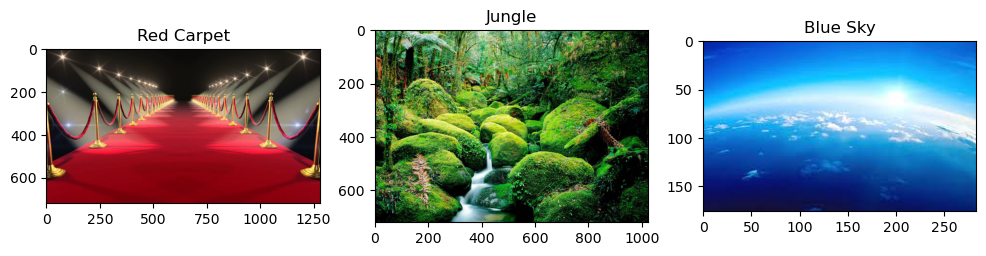

In [65]:
# a)
red = imageio.imread('../data/red-carpets.jpg')
red = torch.from_numpy(red).fl

green = imageio.imread('../data/jungle.jpg')
green = torch.from_numpy(green)

blue = imageio.imread('../data/blue-sky.jpeg')
blue = torch.from_numpy(blue)

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(red)
axes[0].set_title('Red Carpet')

axes[1].imshow(green)
axes[1].set_title('Jungle')

axes[2].imshow(blue)
axes[2].set_title('Blue Sky')

plt.show()

In [72]:
blue_t = blue.permute(2, 0, 1)
green_t = green.permute(2, 0, 1)
red_t = red.permute(2, 0, 1)

mean_red_red = torch.mean(red_t[0].float())  
mean_red_green = torch.mean(red_t[1].float())  
mean_red_blue = torch.mean(red_t[2].float())  
mean_green_red = torch.mean(green_t[0].float())  
mean_green_green = torch.mean(green_t[1].float())  
mean_green_blue = torch.mean(green_t[2].float())  
mean_blue_red = torch.mean(blue_t[0].float())  
mean_blue_green = torch.mean(blue_t[1].float())  
mean_blue_blue = torch.mean(blue_t[2].float())

('red', mean_red_red, mean_red_green, mean_red_blue), ('green', mean_green_red, mean_green_green, mean_green_blue), ('blue', mean_blue_red, mean_blue_green, mean_blue_blue)

(('red', tensor(118.20), tensor(49.20), tensor(48.42)),
 ('green', tensor(64.76), tensor(102.82), tensor(45.81)),
 ('blue', tensor(55.68), tensor(132.16), tensor(201.02)))

#### Select a relatively large file containing Python source code.
#### a) Build an index of all the words in the source file (feel free to make your tokenization as simple or as complex as you like; we suggest starting with replacing r"[^a-zA-Z0-9_]+" with spaces).
#### b) Compare your index with the one we made for Pride and Prejudice. Which is larger?
#### c) Create the one-hot encoding for the source code file.
#### d) What information is lost with this encoding? How does that information compare to what’s lost in the Pride and Prejudice encoding?